# Importing Required Libraries

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import urllib.parse
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Preprocessing

In [2]:
with open('badqueries.txt','r', encoding="utf8") as f:
    data = f.readlines()
data = list(set(data))
bad_query_result = []

#converting url encoded data to simple string
for d in data:
    d = str(urllib.parse.unquote(d))   
    bad_query_result.append(d)

with open('goodqueries.txt','r', encoding="utf8") as f:
    data = f.readlines()
data = list(set(data))
good_query_result = []

#converting url encoded data to simple string
for d in data:
    d = str(urllib.parse.unquote(d))   
    good_query_result.append(d)

badQueries = bad_query_result
validQueries = good_query_result

badQueries = list(set(badQueries))
validQueries = list(set(validQueries))
allQueries = badQueries + validQueries

#labels, 1 for malicious and 0 for clean
yBad = [1 for i in range(0, len(badQueries))] 
yGood = [0 for i in range(0, len(validQueries))]
y = yBad + yGood
queries = allQueries

badCount = len(badQueries)
print("Bad samples: %d" % badCount)
validCount = len(validQueries)
print("Good samples: %d" % validCount)

Bad samples: 44532
Good samples: 1265974


# Performance of data after Down Sampling / under Sampling

TFID Vectorization - Counter after Random under Sampling Counter :  Counter({0: 44532, 1: 44532})


D:\DataScience\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


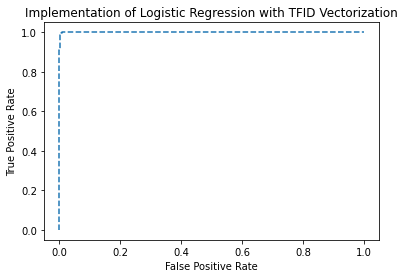


Classification Report for Logistic Regression with TFID Vectorization : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      8967
           1       0.98      1.00      0.99      8846

    accuracy                           0.99     17813
   macro avg       0.99      0.99      0.99     17813
weighted avg       0.99      0.99      0.99     17813

Hashing Vectorization - Counter after Random under Sampling :  Counter({0: 44532, 1: 44532})


D:\DataScience\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


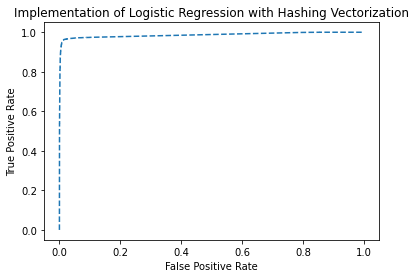


Classification Report for Logistic Regression with Hashing Vectorization : 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      8967
           1       0.93      0.97      0.95      8846

    accuracy                           0.95     17813
   macro avg       0.95      0.95      0.95     17813
weighted avg       0.95      0.95      0.95     17813

AxesSubplot(0.125,0.536818;0.62x0.343182)
AxesSubplot(0.125,0.125;0.62x0.343182)


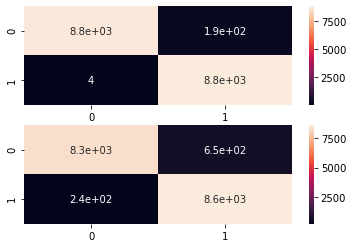

In [3]:
#converting data to vectors using TFID
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer="char", sublinear_tf=True, ngram_range=(1,3)) 
X = vectorizer.fit_transform(queries)


#Random Over Sampling for minority class
rus = RandomUnderSampler()
# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)
# new class distribution 
print('TFID Vectorization - Counter after Random under Sampling Counter : ',Counter(y_rus))

#####################################################################################################################

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)

#Model Building using Logistic Regression
lgs = LogisticRegression(class_weight={1: 2 * validCount / badCount, 0: 1.0})   # class_weight='balanced'
lgs.fit(X_train, y_train)   #training our model
T_predicted = lgs.predict(X_test)

#ROC_AUC_Curve
fpr, tpr, _ = metrics.roc_curve(y_test, (lgs.predict_proba(X_test)[:, 1]))
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Implementation of Logistic Regression with TFID Vectorization")
plt.show()


from sklearn.metrics import classification_report
print('\nClassification Report for Logistic Regression with TFID Vectorization : \n',classification_report(y_test, T_predicted))

########################################################################################################################
########################################################################################################################

#converting data to vectors using Hashing Vectorization
vectorizer = HashingVectorizer() 
H = vectorizer.fit_transform(queries)

#Random Over Sampling for minority class
rus = RandomUnderSampler()
# resampling H, y
H_rus, Hy_rus = rus.fit_resample(H, y)
# new class distribution 
print('Hashing Vectorization - Counter after Random under Sampling : ',Counter(Hy_rus))

######################################################################################################################### 

#splitting data
X_train, X_test, y_train, Hy_test = train_test_split(H_rus, Hy_rus, test_size=0.2, random_state=42)

#Model Building using Logistic Regression
lgs = LogisticRegression(class_weight={1: 2 * validCount / badCount, 0: 1.0})   # class_weight='balanced'
lgs.fit(X_train, y_train)   #training our model
H_predicted = lgs.predict(X_test)

#ROC_AUC_Curve
fpr, tpr, _ = metrics.roc_curve(Hy_test, (lgs.predict_proba(X_test)[:, 1]))
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Implementation of Logistic Regression with Hashing Vectorization")
plt.show()


from sklearn.metrics import classification_report
print('\nClassification Report for Logistic Regression with Hashing Vectorization : \n',classification_report(Hy_test, H_predicted))


######################################################################################################################

#Heat Map------------------------------1.TFID vectorization    2.Hashing vectorization---------------------------------------

TFID_Conf_Matrix = confusion_matrix(y_test,T_predicted)
H_Conf_Matrix = confusion_matrix(Hy_test,H_predicted)

fig, ax =plt.subplots(2,1)
plot=[TFID_Conf_Matrix,H_Conf_Matrix]

for i,j in zip(plot,[0,1]):
    print(sns.heatmap(i, ax=ax[j],annot=True))
    